In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
import pandas as pd
import scipy.stats as ss

z_thresh = 4

In [21]:


post_saline = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/Megadicts/saline_post_dict.pkl"
post_psilo = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/Megadicts/psilo_post_dict.pkl"

with open(post_saline,'rb') as f:
    post_saline = pickle.load(f)

with open(post_psilo,'rb') as f:
    post_psilo = pickle.load(f)

In [22]:
all_dicts_psilo_str = ["psilo_184","psilo_186","psilo_237","psilo_239","psilo_251","psilo_269","psilo_276"]
cell_list_1 = list(post_psilo[all_dicts_psilo_str[0]].keys())
dict_keys = list(post_psilo.keys())

nfreq = list(post_psilo[all_dicts_psilo_str[0]][cell_list_1[0]]['traces'].keys())
nInt = list(post_psilo[all_dicts_psilo_str[0]][cell_list_1[0]]['traces'][nfreq[0]].keys())
ntrial = list(post_psilo[all_dicts_psilo_str[0]][cell_list_1[0]]['traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)


[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [23]:
sensitivity_saline = []
for dict in post_saline:
    cell_list = list(post_saline[dict].keys())
    for cell in cell_list:
        tuning_array = np.array(post_saline[dict][cell]['tuning'])
        for j in range(len(nInt)):
            if any(y > z_thresh for y in tuning_array[0:,j]):
                sensitivity_saline.append(float(j))
                break
            else:
                continue

In [24]:
sensitivity_psilo = []
for dict in post_psilo:
    cell_list = list(post_psilo[dict].keys())
    for cell in cell_list:
        tuning_array = np.array(post_psilo[dict][cell]['tuning'])
        for j in range(len(nInt)):
            if any(y > z_thresh for y in tuning_array[0:,j]):
                sensitivity_psilo.append(float(j))
                break
            else:
                continue

In [25]:
print(sensitivity_saline)
print(sensitivity_psilo)

[3.0, 0.0, 2.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0, 0.0, 3.0, 0.0, 1.0, 1.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 3.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 3.0, 1.0, 3.0, 0.0, 1.0, 0.0, 3.0, 3.0, 1.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 1.0, 1.0, 2.0, 3.0, 0.0, 3.0, 0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 3.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 3.0, 3.0, 0.0, 1.0, 3.0, 2.0, 1.0, 2.0, 1.0, 0.0, 2.0, 3.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 3.0, 2.0, 1.0, 2.0, 0.0, 3.0, 3.0, 0.0, 2.0, 2.0, 3.0, 0.0, 2.0, 2.0, 0.0, 0.0, 2.0, 3.0, 0.0, 3.0, 1.0, 3.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 3.0, 1.0, 0.0, 0.0, 2.0, 2.0, 3.0, 3.0, 0.0, 3.0, 0.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 3.0, 1.0, 2.0, 0.0, 2.0, 2.0, 2.0, 3.0, 0.0, 0.0, 2.0, 3.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 3.0,

In [26]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

array_saline = ecdf(sensitivity_saline)
print(array_saline[1])

array_psilo = ecdf(sensitivity_psilo)
print(array_psilo[1])

[0.35528816 0.60354655 0.83280557 1.        ]
[0.39747634 0.64921136 0.83154574 1.        ]


In [27]:
def plot_cdf(data):
    # Define your series
    s = pd.Series(data, name = 'value')
    df = pd.DataFrame(s)
    # Get the frequency, PDF and CDF for each value in the series

    # Frequency
    stats_df = df \
    .groupby('value') \
    ['value'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'value': 'frequency'})

    # PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    # CDF
    stats_df['cdf'] = stats_df['pdf'].cumsum()
    stats_df = stats_df.reset_index()
    stats_df

    return stats_df

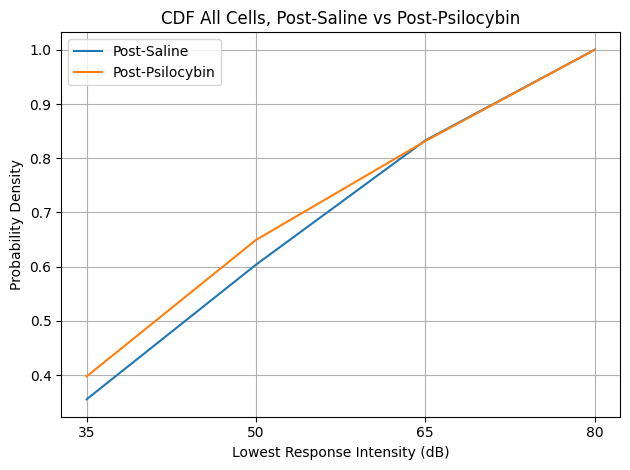

In [28]:
saline = plot_cdf(sensitivity_saline)
psilocybin = plot_cdf(sensitivity_psilo)

label = ["Post-Saline","Post-Psilocybin"]

zipped = zip([saline,psilocybin], label)

fig = plt.figure()

for frame,label in zipped:
    plt.plot(frame['value'], frame['cdf'],label = label )
plt.title("CDF All Cells, Post-Saline vs Post-Psilocybin")
plt.xticks(range(len(nInt)), nInt)
plt.xlabel("Lowest Response Intensity (dB)")
plt.ylabel("Probability Density")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()